In [1]:
Train_path = "Coviddataset/Train"
Val_path = "Coviddataset/Val"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
import tensorflow as tf

In [3]:
pip install keras

In [3]:
#CNN based model in keras

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])



In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [6]:
#Train from scratch

Train_dataset = image.ImageDataGenerator(rescale= 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


Test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
#Change the paths  
Train_gen = Train_dataset.flow_from_directory(
       'Coviddataset/Train',
        target_size = (224,224),
        batch_size = 32,
        class_mode = 'binary' )

Valid_gen = Test_dataset.flow_from_directory(
       'Coviddataset/Val',
        target_size = (224,224),
        batch_size = 32,
        class_mode = 'binary')

Found 286 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [8]:
hist = model.fit(
        Train_gen,
        steps_per_epoch = 8,
        epochs = 10,
        validation_data = Valid_gen,
        validation_steps = 2)

Epoch 1/10
8/8 [==============================] - 169s 19s/step - loss: 1.7024 - accuracy: 0.5001 - val_loss: 0.6815 - val_accuracy: 0.6406
Epoch 2/10
8/8 [==============================] - 85s 10s/step - loss: 0.6718 - accuracy: 0.5682 - val_loss: 0.6277 - val_accuracy: 0.9219
Epoch 3/10
8/8 [==============================] - 84s 10s/step - loss: 0.5256 - accuracy: 0.7714 - val_loss: 0.4016 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 111s 14s/step - loss: 0.3548 - accuracy: 0.8552 - val_loss: 0.2806 - val_accuracy: 0.9219
Epoch 5/10
8/8 [==============================] - 88s 11s/step - loss: 0.3219 - accuracy: 0.8828 - val_loss: 0.2561 - val_accuracy: 0.9219
Epoch 6/10
8/8 [==============================] - 79s 10s/step - loss: 0.4138 - accuracy: 0.8472 - val_loss: 0.2132 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 80s 10s/step - loss: 0.4406 - accuracy: 0.8519 - val_loss: 0.3625 - val_accuracy: 0.8438
Epoch 8/10
8/8 [=========

In [16]:
model.save('model.h5')

In [19]:
new_model = tf.keras.models.load_model('model.h5')

In [20]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

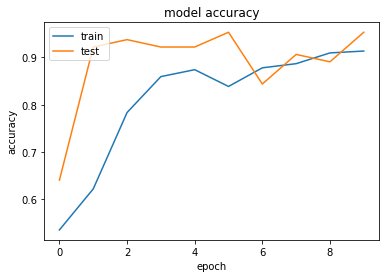

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Acc.png')

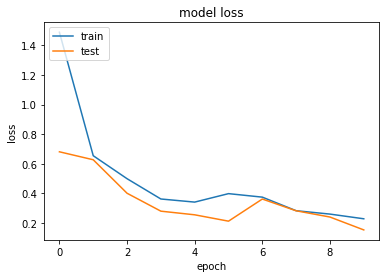

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss.png')

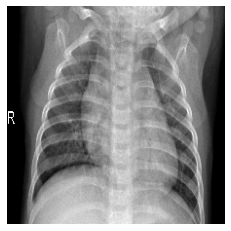

True label: Covid
Predicted label: Covid


In [29]:
def get_class_string_from_index(index):
   for class_string, class_index in Valid_gen.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(Valid_gen)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))